In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_excel("Superstore_USA.xlsx")

In [4]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [5]:
dataset.shape

(9426, 24)

### first we will start with missing value analysis


In [6]:
dataset.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [7]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523


In [8]:
dataset.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [9]:
dataset.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9354.000000,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,139.236410,13.798430,949.706272,82318.489073
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135229,29374.597802,998.486483,15.107688,2598.019818,19149.448857
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,16332.414000,170.000000,100119.160000,91591.000000


In [18]:
# dataset["Product Base Margin"].fillna(0.5,inplace = True)

In [10]:
dataset["Product Base Margin"].fillna(dataset["Product Base Margin"].mean(),inplace = True)

In [11]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [21]:
order_priority_counts= dataset['Order Priority'].value_counts()

In [22]:
order_priority_counts

High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: Order Priority, dtype: int64

In [19]:
 dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical'], dtype=object)

## Order priority 

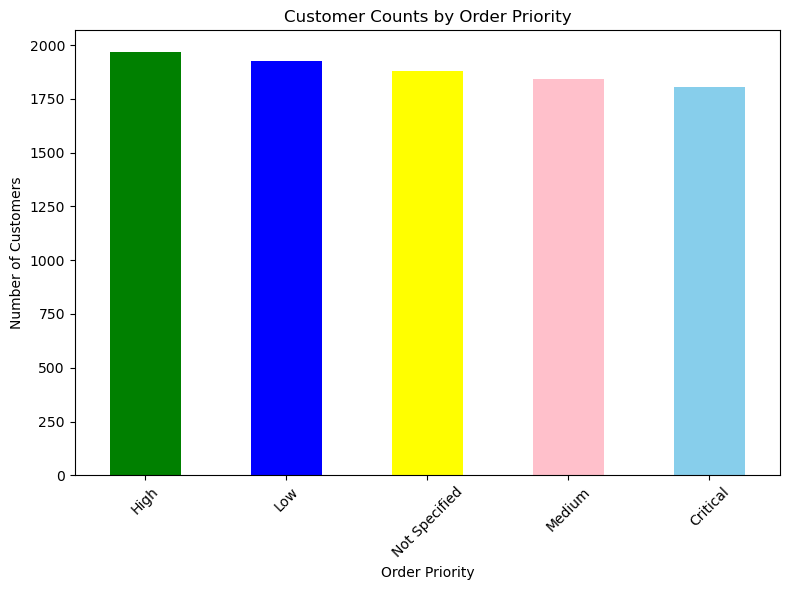

In [34]:
plt.figure(figsize=(8, 6))
c = ["green","blue","yellow","pink","skyblue"]
order_priority_counts.plot(kind='bar', color=c)
plt.title('Customer Counts by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

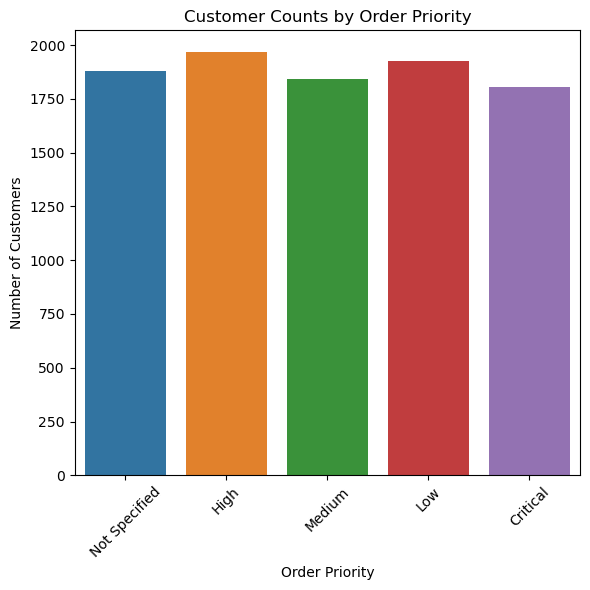

In [35]:
plt.figure(figsize= (6,6))
sns.countplot(x='Order Priority', data=dataset)
plt.title('Customer Counts by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
# plt.savefig("Customer Counts by Order Priority.jpg")
plt.tight_layout()
plt.show()


In [36]:
dataset.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID'],
      dtype='object')

In [37]:
ship_mode_counts= dataset['Ship Mode'].value_counts()

In [38]:
ship_mode_counts

Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: Ship Mode, dtype: int64

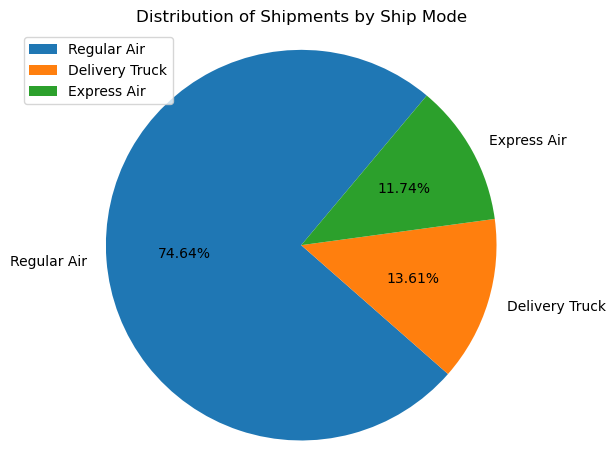

In [68]:
plt.pie(y,labels= x,startangle = 50, autopct="%0.2f%%")
plt.title('Distribution of Shipments by Ship Mode')
plt.legend(loc =2)
plt.axis('equal')
plt.tight_layout()
plt.savefig("Distribution of Shipments by Ship Mode.jpg")
plt.show()

In [62]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


### bivariant analysis 

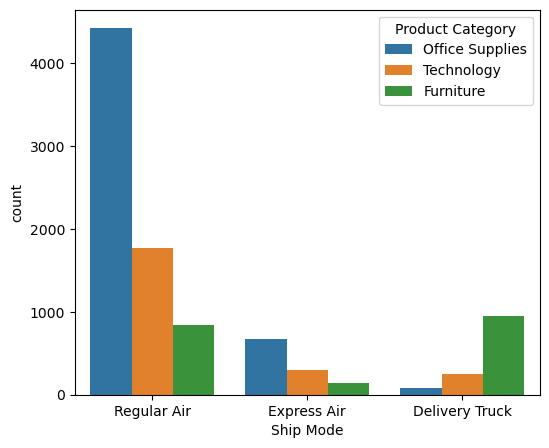

In [66]:
plt.figure(figsize = (6,5))
sns.countplot(data = dataset, x="Ship Mode",hue = "Product Category")
plt.show()

In [69]:
customer_segment_Counts = dataset['Customer Segment'].value_counts()

In [70]:
customer_segment_Counts

Corporate         3375
Home Office       2316
Consumer          1894
Small Business    1841
Name: Customer Segment, dtype: int64

## customer segment

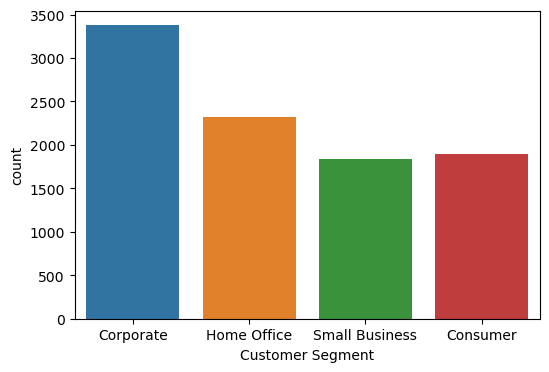

In [74]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Customer Segment", data = dataset)
plt.show()

In [44]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

In [46]:
x

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object')

In [47]:
y

array([7036, 1283, 1107], dtype=int64)

In [76]:
dataset.head(2)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522


## product catogory

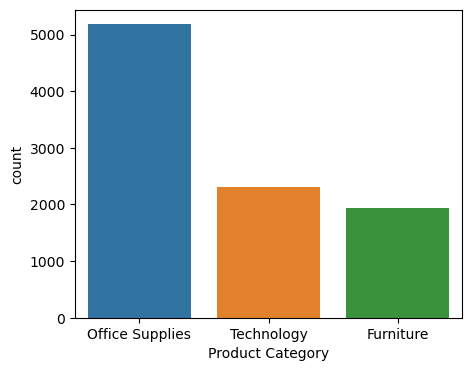

In [93]:
plt.figure(figsize = (5,4))
sns.countplot(x = "Product Category", data = dataset)
plt.show()

In [79]:
product_Catogory_Count = dataset["Product Category"].value_counts()

In [82]:
product_Catogory_Count

Office Supplies    5181
Technology         2312
Furniture          1933
Name: Product Category, dtype: int64

## product sub category

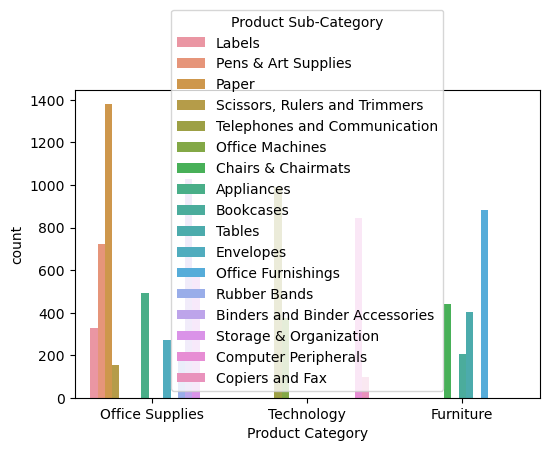

In [99]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Product Category",hue = "Product Sub-Category",data = dataset)
plt.show()

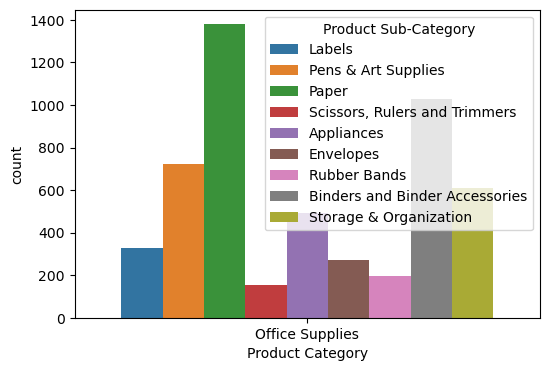

In [98]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Product Category",hue = "Product Sub-Category",data = dataset[dataset["Product Category"] =="Office Supplies"])

plt.show()

In [ ]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Product Category",hue = "Product Sub-Category",data = dataset[dataset["Product Category"] =="Office Supplies"])
plt.show()

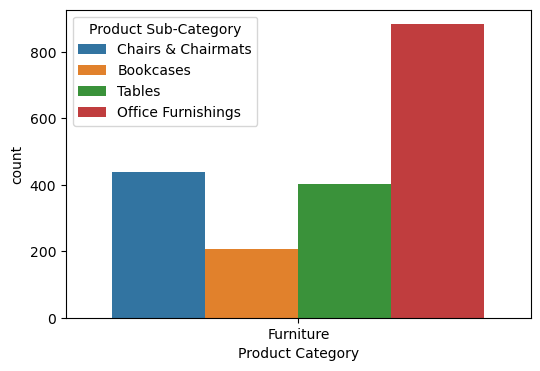

In [101]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Product Category",hue = "Product Sub-Category",data = dataset[dataset["Product Category"] =="Furniture"])
plt.show()

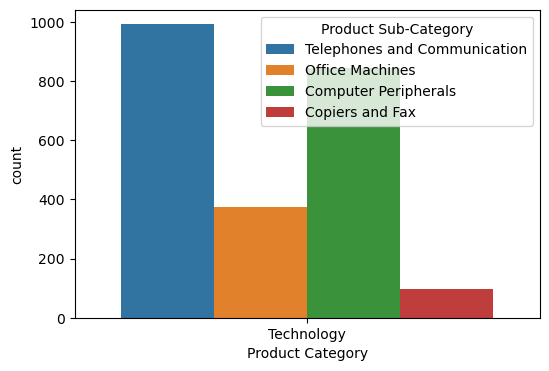

In [107]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Product Category",hue = "Product Sub-Category",data =  dataset[dataset["Product Category"]=="Technology"])
plt.show()

In [105]:
dataset["Product Category"].value_counts()

Office Supplies    5181
Technology         2312
Furniture          1933
Name: Product Category, dtype: int64

In [110]:
dataset['Year'] = dataset['Order Date'].dt.year

In [111]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522,2010
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523,2011
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523,2011
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523,2011


In [114]:
sales_by_year = dataset.groupby('Year')['Sales'].sum().round()

In [115]:
sales_by_year

Year
2010    1924333.0
2011    1944507.0
2012    2230731.0
2013    2852360.0
Name: Sales, dtype: float64

In [123]:
sales_counts_by_year = dataset["Year"].value_counts()
sales_counts_by_year

2013    3054
2012    2241
2011    2179
2010    1952
Name: Year, dtype: int64

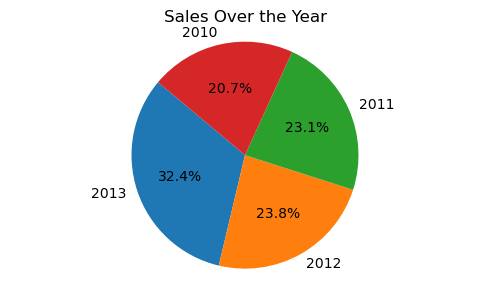

In [170]:
plt.figure(figsize=(5, 3))
plt.pie(sales_counts_by_year, labels=sales_counts_by_year.index, autopct='%1.1f%%', startangle=140,)
plt.title('Sales Over the Year')

plt.axis('equal')
plt.tight_layout()
plt.show()

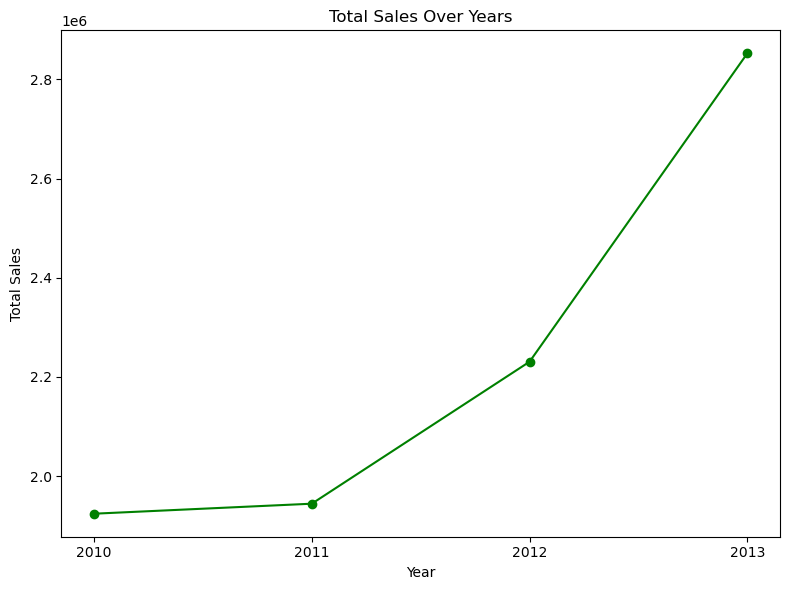

In [171]:
plt.figure(figsize=(8, 6))
sales_by_year.plot(kind='line', marker='o', color='green',)
plt.title('Total Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(sales_by_year.index)

plt.tight_layout()
plt.show()

### profit 

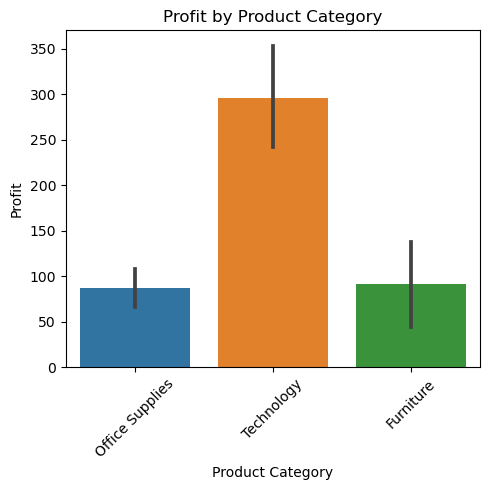

In [172]:
plt.figure(figsize=(5,5))
sns.barplot(x='Product Category', y='Profit', data=dataset)
plt.title('Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


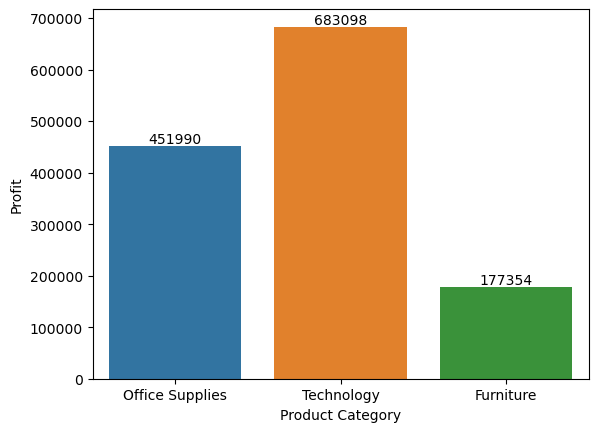

In [129]:
ax = sns.barplot(dataset, x="Product Category", y="Profit", estimator="sum", errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10);

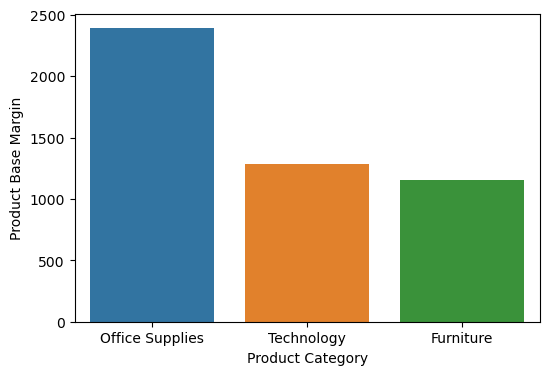

In [167]:
plt.figure(figsize = (6,4))
sns.barplot(dataset, x="Product Category", y="Product Base Margin", estimator="sum", errorbar=None)
plt.show()

In [133]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522,2010
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523,2011
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523,2011
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523,2011


In [135]:
dataset["State or Province"].value_counts().nlargest(5)

California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: State or Province, dtype: int64

In [137]:
## 2nd methods to find top 5 items
dataset["State or Province"].value_counts()[:5]

California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: State or Province, dtype: int64

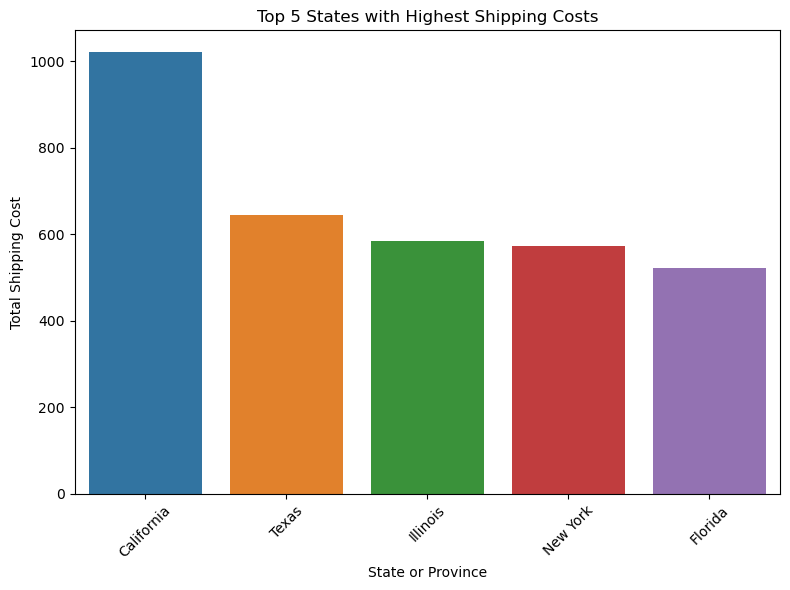

In [173]:
plt.figure(figsize=(8, 6))
sns.barplot(x=top5_states.index, y=top5_states.values)
plt.title('Top 5 States with Highest Shipping Costs')
plt.xlabel('State or Province')
plt.ylabel('Total Shipping Cost')
# plt.savefig("Top 5 states ")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
top5_states= dataset["State or Province"].value_counts().nlargest(5)
top5_states.index

Index(['California', 'Texas', 'Illinois', 'New York', 'Florida'], dtype='object')

In [141]:
top5_states= dataset["State or Province"].value_counts().nlargest(5)
# top5_states.values

array([1021,  646,  584,  574,  522], dtype=int64)

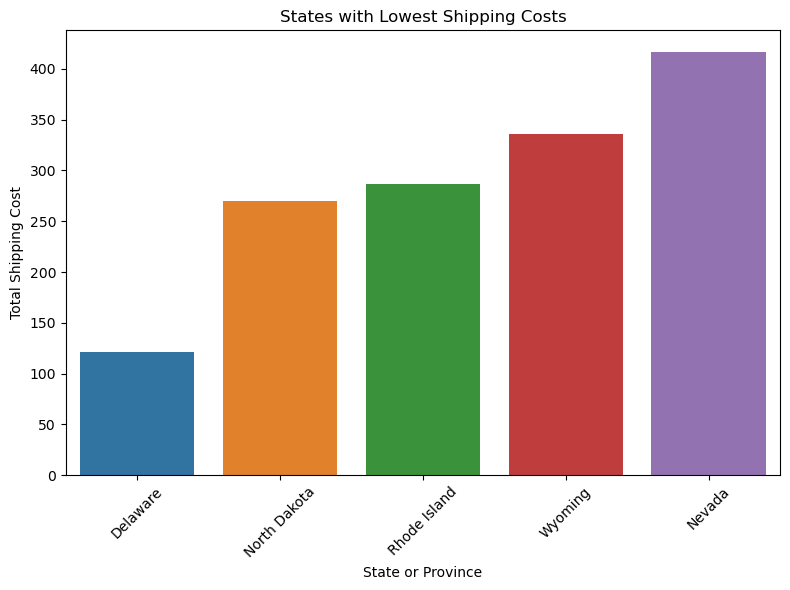

In [168]:
bottom_states = dataset.groupby("State or Province")["Shipping Cost"].sum().nsmallest(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=bottom_states.index, y=bottom_states.values)
plt.title('States with Lowest Shipping Costs')
plt.xlabel('State or Province')
plt.ylabel('Total Shipping Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [152]:
dataset.groupby("State or Province")["Shipping Cost"].sum().nsmallest(5)

State or Province
Delaware        121.17
North Dakota    270.02
Rhode Island    286.79
Wyoming         335.41
Nevada          417.08
Name: Shipping Cost, dtype: float64

In [162]:
dataset.groupby("State or Province")["Shipping Cost"].sum().nlargest(5).values

array([13576.52,  7731.6 ,  7297.93,  7214.73,  6249.75])

In [159]:
top_states

array([13576.52,  7731.6 ,  7297.93,  7214.73,  6249.75])